# Adventures Cycles Work

In this analysis task we are looking at different aspects to figure out what are contributing factors towards the decrease in total profits during the last few months. The data considered here is from **July 2005 until June 2008** and is majorly divided into quarters to get a better picture of numbers.

**TL;DR:**
- Accessories and Clothing contributes towards loss, especially helmets/bottles & cages; jersey/socks/gloves
- Bikes and Components which bring major profit shows decline over last quarter 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from IPython.core.display import display, HTML
from datetime import datetime, timedelta, date
# display(HTML("<style>.container { width:100% !important; }</style>"))

## Loading csv file

In [2]:
df = pd.read_csv("adventure_works_purchase_orders.csv")

In [3]:
df.head(2)

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,...,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
0,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.0944,3374.99,0.0,1,51.3415
1,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.0944,3374.99,0.0,3,51.3415


In [4]:
"""
- Date conversion
- Profit calculation using formula-
Profit = (UnitPrice - (UnitDiscount * UnitPrice) - UnitFreightCost - UnitCost) * OrderQty
"""

df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['profit'] = ((df['UnitPrice']-(df['UnitPrice']*df['UnitPriceDiscount']))-df['Unit_Cost']-df['Unit_Freight_Cost'])*df['OrderQty']

In [5]:
"""
Loss calculation
"""

df1 = df[df['profit']<0].groupby(['OrderDate','Product_Category','Product_Sub_Category','Product_Name']).agg({'profit':'sum','OrderQty':'sum'}).rename(columns={'profit':'loss','OrderQty':'negative_qty'}).sort_index()


In [6]:
"""
Profit calculation
"""

df2 = df[df['profit']>0].groupby(['OrderDate','Product_Category','Product_Sub_Category','Product_Name']).agg({'profit':'sum','OrderQty':'sum'}).rename(columns={'profit':'profit','OrderQty':'positive_qty'}).sort_index()


In [7]:
df3 = pd.concat([df1,df2], axis=1, join="outer").reset_index()

In [8]:
df3['negative_qty'] = df3['negative_qty'].astype('Int64')
df3['positive_qty'] = df3['positive_qty'].astype('Int64')

## Functions

In [9]:
"""
Conversion of Date to Year_Quarter format
"""

def get_quarter(d):
    return "%d_Q%d" % (d.year,math.ceil(d.month/3))

In [10]:
quarter_order = ['2005_Q3', '2005_Q4', '2006_Q1', '2006_Q2', '2006_Q3', '2006_Q4', '2007_Q1', '2007_Q2', '2007_Q3', '2007_Q4','2008_Q1','2008_Q2']

## Profit and loss over time

1. One pattern to observe here is that profit is less at the beginning of each quarter gradually increasing and declines by the time it reaches the beginning of next quarter

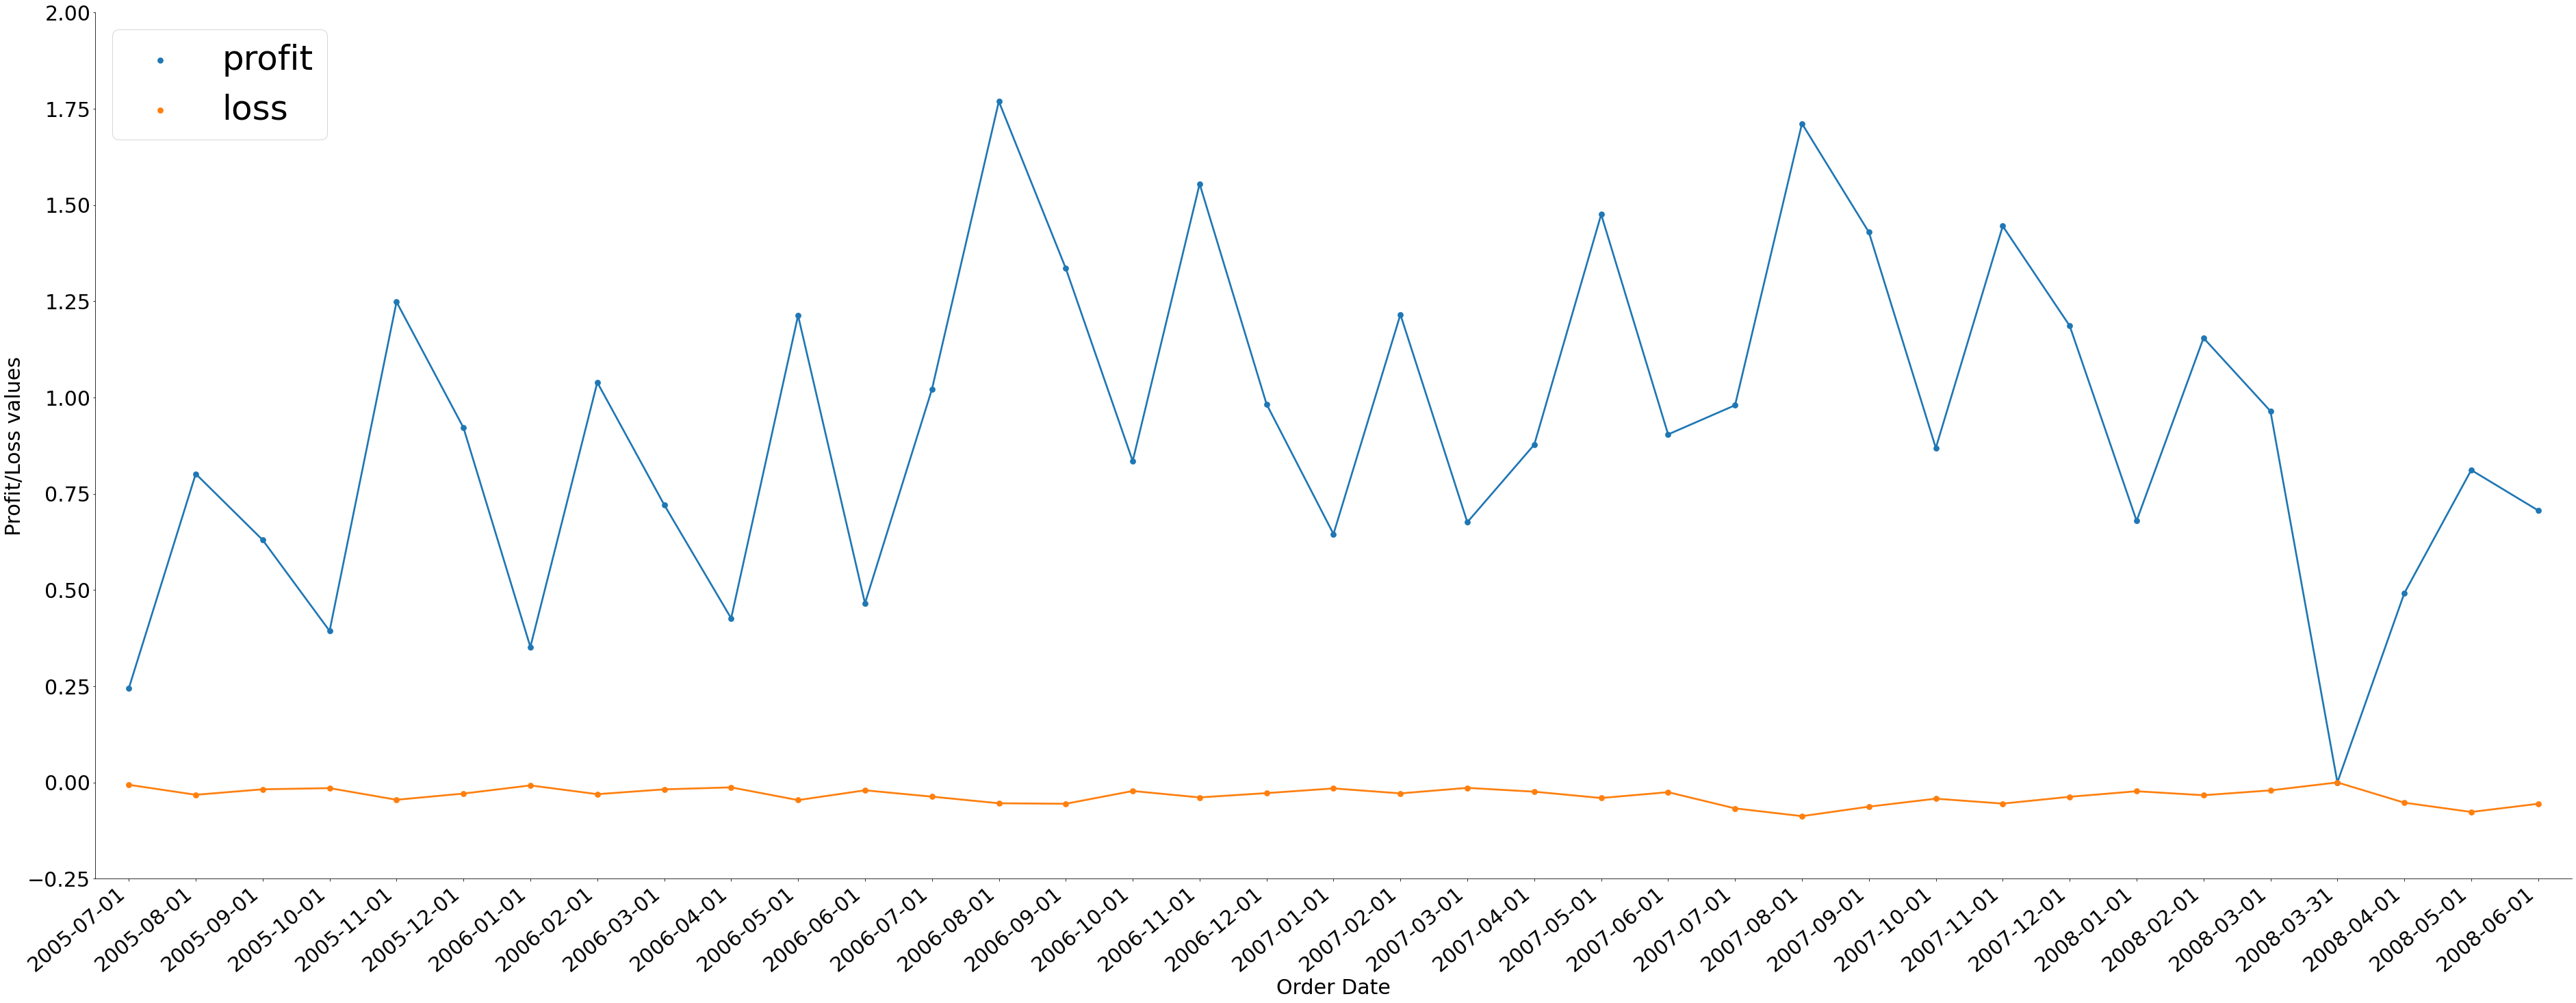

In [11]:
"""
Plot depicting Profit and Loss for each month
"""

df4 = df3.groupby(df3['OrderDate'].dt.date).agg({'profit':'sum','loss':'sum'}).reset_index()
dfm = df4.melt('OrderDate', var_name='cols', value_name='vals')
g = sns.catplot(x="OrderDate", y="vals", hue='cols', data=dfm, kind='point',height=18.27, aspect=14.7/5.27, linewidth = 4,legend=False)
g.set_xticklabels(rotation=40, ha="right",fontsize = 30)
g.set_axis_labels(x_var="Order Date", y_var="Profit/Loss values",fontsize = 30)
g.set_yticklabels(ha="right",fontsize = 30)
plt.legend(loc='upper left', fontsize = 50)

## Profit/Loss over quarterly period 

1. We can clearly observe that profit has decreased over last 3 quarter starting from Q3 2007

2. Loss has increased over last quarter 

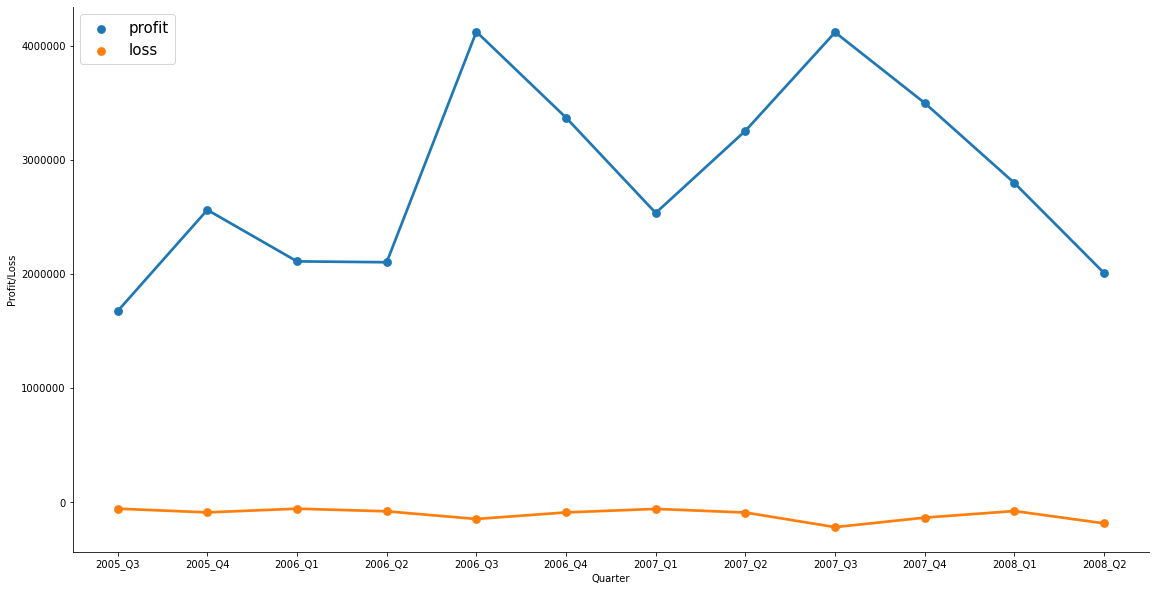

In [12]:
"""
- Calculate Profit and Loss for each quarter
- Unpivot dataframe from wide to long format for plotting
- Plot depicting Profit and Loss for each quarter
"""

df4['Quarter'] = df4['OrderDate'].apply(get_quarter)
df5 = df4.groupby('Quarter').agg({'profit':'sum','loss':'sum'}).reset_index()

dfm = df5.melt('Quarter', var_name='cols', value_name='Profit/Loss')

g = sns.catplot(x="Quarter", y='Profit/Loss', hue='cols', data=dfm, kind='point',height=8.27, aspect=11.7/6.27, order = quarter_order,legend=False)
plt.ticklabel_format(style='plain', axis='y')
# sns.set_theme(font_scale= 1.7)
plt.legend(loc='upper left', fontsize = 15)
g.savefig("overall_profit.png")

## Total profit over quarterly period

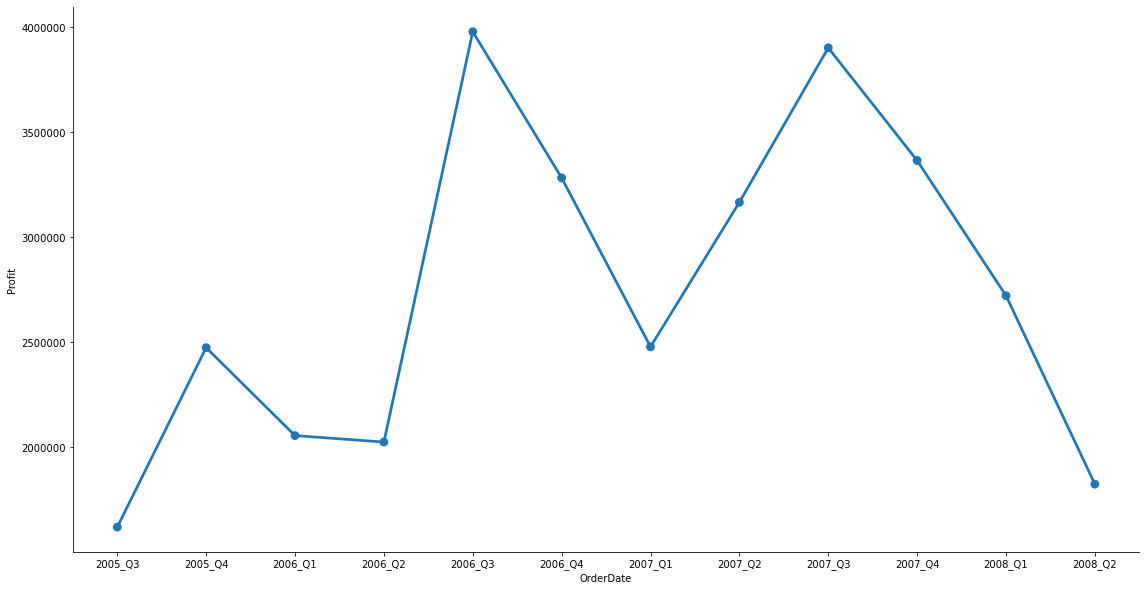

In [13]:
"""
- Calculate Total Profit for each quarter
- Unpivot dataframe from wide to long format for plotting
- Plot depicting total Profit for each quarter
"""

total_profit = df.groupby(df['OrderDate'].apply(get_quarter)).agg({'profit':'sum'}).reset_index()

dfm = total_profit.melt('OrderDate', var_name='cols', value_name='Profit')

g = sns.catplot(x='OrderDate', y='Profit',  data=dfm, kind='point',height=8.27, aspect=11.7/6.27, order = quarter_order,legend=False)
plt.ticklabel_format(style='plain', axis='y')


## Profit/Loss percentage for different product categories over quarterly period

1. Accessories and Clothing contributes to loss more than profit

2. Bikes and Components which connributes to the majority profit also contributes for loss over last quaters 



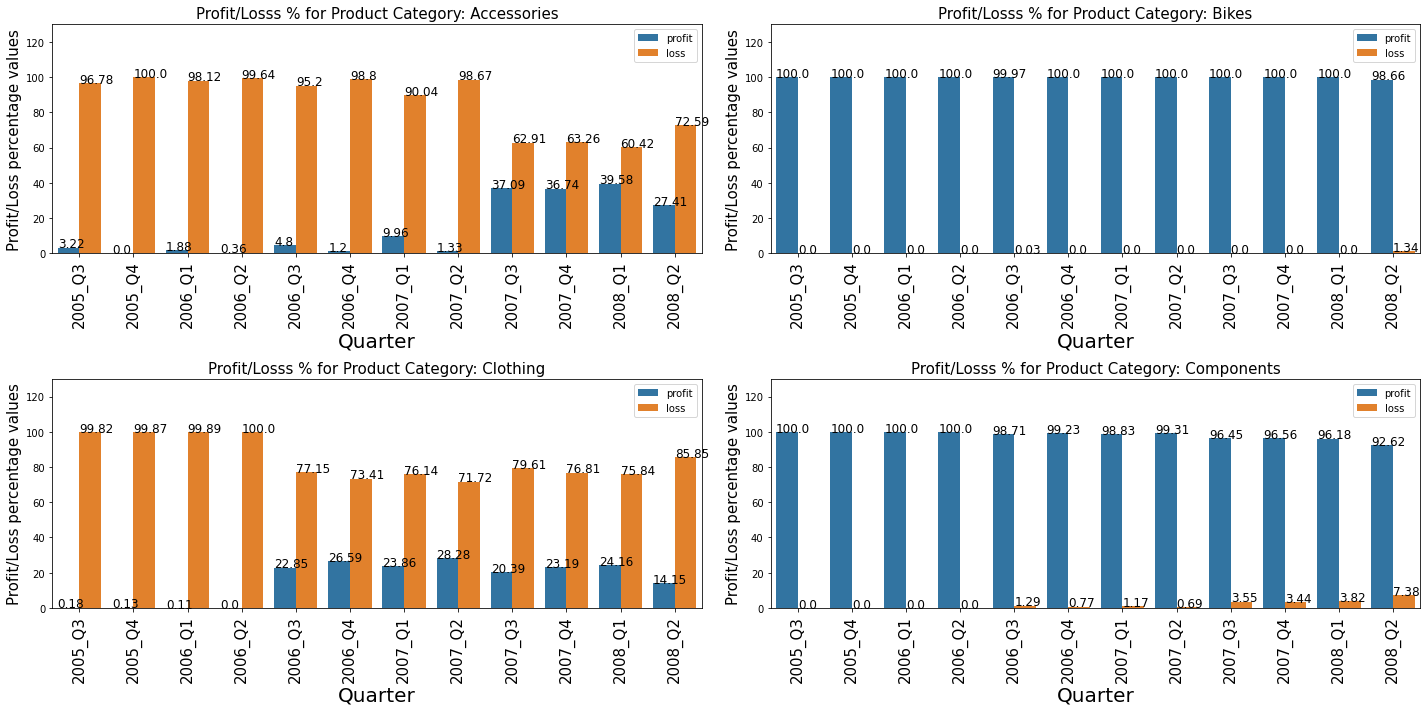

In [14]:
"""
- Calculate Profit/Loss for each quarter for different product categories
- Unpivot dataframe from wide to long format for plotting
- Plot subplots depicting Profit and Loss for each quarter
"""

profit_category_df = df3.groupby([df3['OrderDate'].apply(get_quarter),'Product_Category']).agg({'profit':'sum','loss':'sum'}).reset_index()
dfm = profit_category_df.melt(id_vars=['OrderDate', 'Product_Category'], 
              value_vars=['profit', 'loss'],
              var_name='profit_loss', value_name='value')
dfm['abs_value'] = dfm["value"].abs()

fig, ax = plt.subplots(2,2, figsize = (20,10))
x_val,y_val = ['OrderDate', 'Product_Category','profit_loss'], 'abs_value'

df_dummy = dfm.groupby(x_val)[y_val].sum()
label = ['profit', 'loss']
df_grouped = df_dummy.groupby(level=[0,1]).apply(lambda m:100 * m / float(m.sum()))
df_grouped = df_grouped.rename("profit_per").reset_index()

product_category = ["Accessories","Bikes","Clothing","Components"]

for m, a in (zip(product_category, ax.flatten())):
    g = sns.barplot(x = x_val[0], y = 'profit_per', hue = x_val[2], data = df_grouped[(df_grouped["Product_Category"] == m)], ax = a, hue_order=label, order = quarter_order,ci=None)
    a.set_title("Profit/Losss % for Product Category: " + m, fontsize = 15)
    a.set_xlabel("Quarter", fontsize = 20)
    a.set_ylabel("Profit/Loss percentage values", fontsize = 15)
    g.set_ylim(0, 130)
    g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 15)
    for p in g.patches:
        text = str(np.nan_to_num(p.get_height(), 0).round(2))
        text_x = p.get_x()
        text_y = np.nan_to_num(p.get_height(),0)
        g.text(text_x,text_y,text,fontsize = 12)
    a.legend(loc="upper right", fontsize=10)
fig.tight_layout()
fig.savefig("profit_per_categories.png") 


## Average Profit per product

1. Average Profit earned per product of Bike and Components which are major contributors of profit has decreased over time.

2. Loss from product Accessories and Clothing has decreased over time


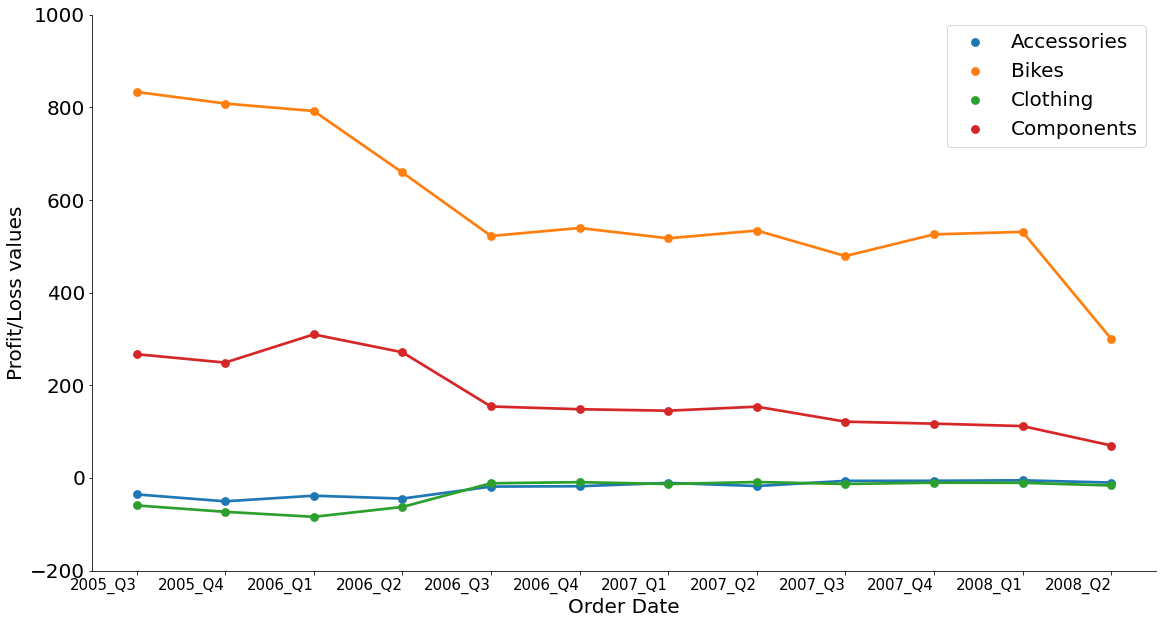

In [15]:
"""
- Calculate Average Profit for each product
- Plot depicting average profit for each quarter
"""

Average_Profit = df.groupby([df['OrderDate'].apply(get_quarter),'Product_Category']).agg({'OrderQty':'sum','profit':'sum'}).reset_index()
Average_Profit['percent'] = (Average_Profit['profit']/Average_Profit['OrderQty'])

g = sns.catplot(x="OrderDate", y="percent", hue='Product_Category', data=Average_Profit, kind='point',height=8.27, aspect=11.7/6.27, order = quarter_order,legend=False)
g.set_axis_labels(x_var="Order Date", y_var="Profit/Loss values",fontsize = 20)
g.set_yticklabels(ha="right",fontsize = 20)
g.set_xticklabels(ha="right",fontsize = 15)
plt.legend(loc='upper right', fontsize = 20)
g.savefig("avg_profit_per_category.png") 


### Order Qty for different product categories

1. This chart shows number of products sold over time for each category.

2. Though the number of products sold has increased in last quarter, Due to increase in unit cost for production of bike was increased and along with that discount was given on bikes in last quarter resulting in lesser profit. 

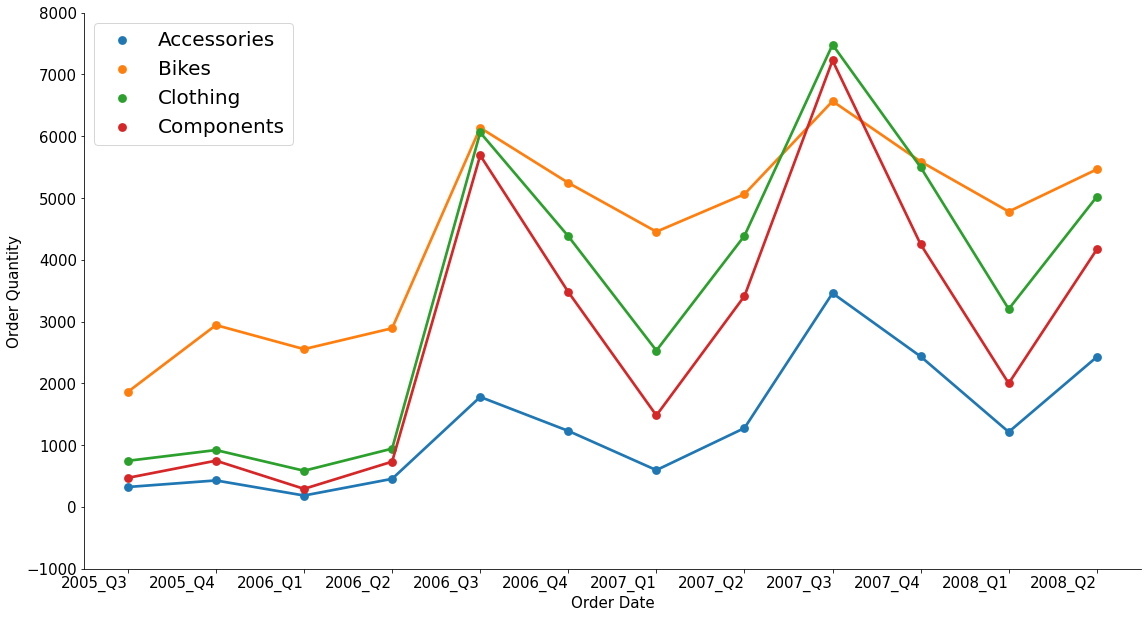

In [16]:
"""
Plot depicting total order quantity for each quarter
"""

g = sns.catplot(x="OrderDate", y="OrderQty", hue='Product_Category', data=Average_Profit, kind='point',height=8.27, aspect=11.7/6.27, order = quarter_order,legend=False)
g.set_yticklabels(ha="right",fontsize = 15)
g.set_xticklabels(ha="right",fontsize = 15)
g.set_axis_labels(x_var="Order Date", y_var="Order Quantity",fontsize = 15)
plt.legend(loc='upper left', fontsize = 20)
g.savefig("No_products_sold_per_category.png") 


### Average discount across different product category over quarterly period

In [17]:
Sales_Discount_df = df.groupby([df['OrderDate'].apply(get_quarter),'Product_Category']).agg({'UnitPriceDiscount':'mean'}).reset_index()
Sales_Discount_df['UnitPriceDiscount'] = Sales_Discount_df['UnitPriceDiscount'] *100


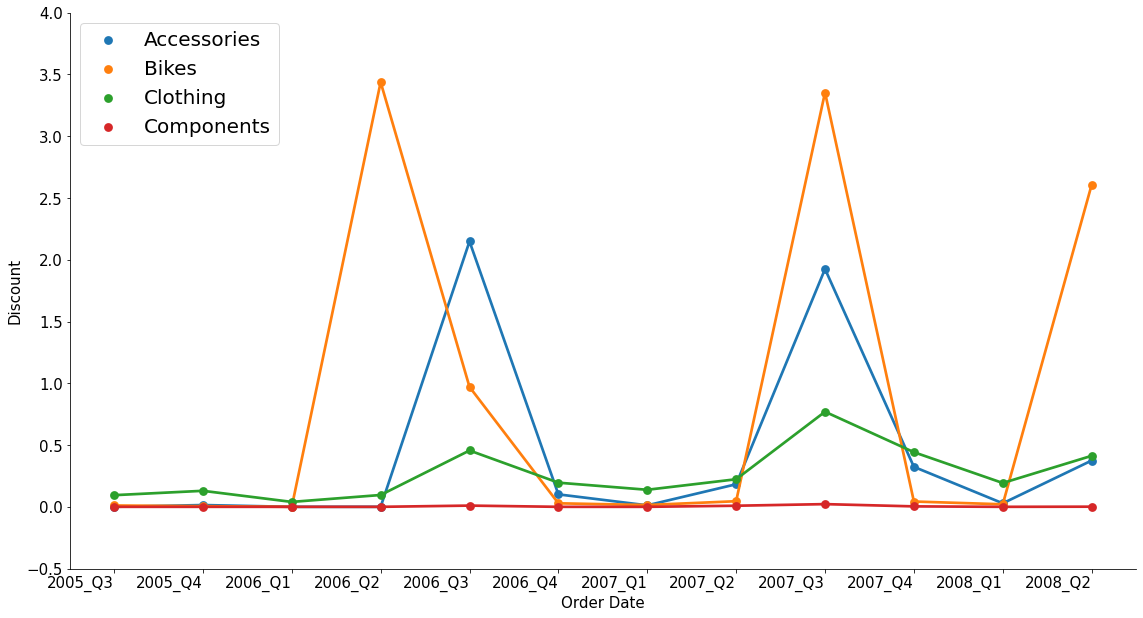

In [18]:
"""
Average discount for different product categories
"""

g = sns.catplot(x="OrderDate", y="UnitPriceDiscount", hue='Product_Category', data=Sales_Discount_df, kind='point',height=8.27, aspect=11.7/6.27, order = quarter_order,legend=False)
g.set_yticklabels(ha="right",fontsize = 15)
g.set_xticklabels(ha="right",fontsize = 15)
g.set_axis_labels(x_var="Order Date", y_var="Discount",fontsize = 15)
plt.legend(loc='upper left', fontsize = 20)
g.savefig("Average_discount_per_category.png") 


### Average unit freight cost, unit price discount, unit cost and unit price over quarterly period

1. Here we are trying to observe average unitprice, cost price, freight cost and discounts over the qaurters
2. We have plotted it for different product categories to get a broader perspective 
3. As we can see from the chart Average Unit Cost has increased over time while the Average sales/Unit price have decreased for Bikes.

In [19]:
# import matplotlib
# matplotlib.rc_file_defaults()

In [20]:
"""
Calculate average frieght cost, unit price, unit cost and unit price
"""

p = df.groupby([df['OrderDate'].apply(get_quarter),'Product_Category']).agg({'UnitPriceDiscount':'mean','Unit_Freight_Cost':'mean','Unit_Cost':'mean','UnitPrice':'mean'}).reset_index()
p["UnitPriceDiscount"] = p["UnitPriceDiscount"] * 100


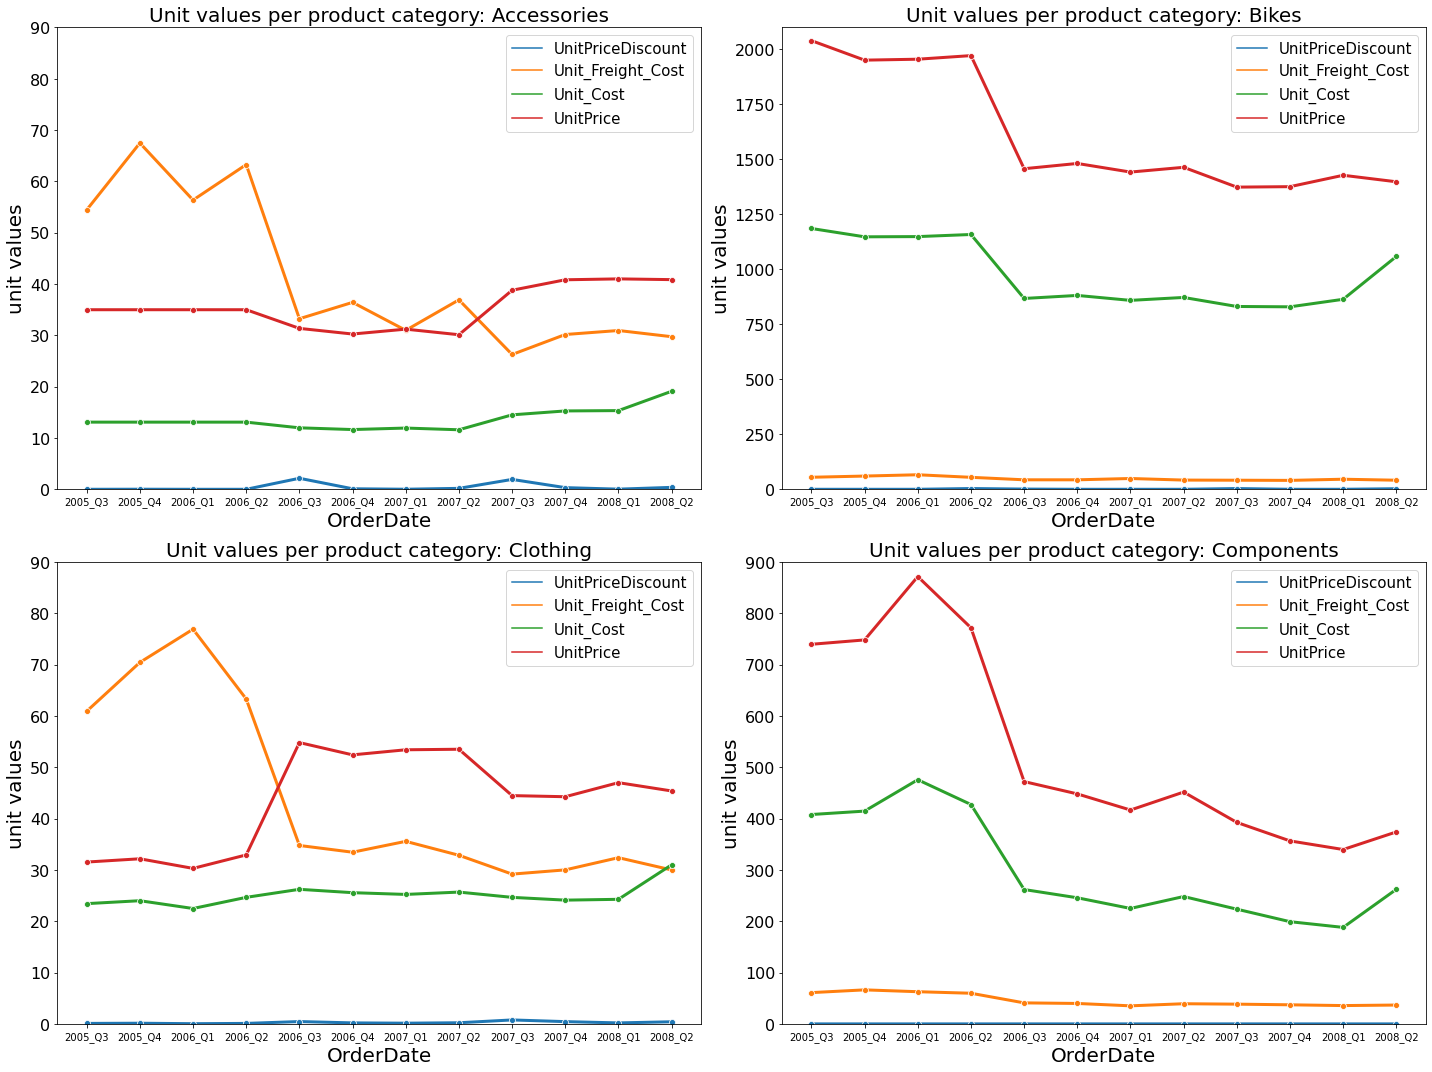

In [21]:
"""
- Unpivot dataframe from wide to long format for plotting
- Plot average frieght cost, unit price, unit cost and unit price for each quarter
"""

dfm = p.melt(id_vars=['OrderDate', 'Product_Category'], 
              value_vars=['UnitPriceDiscount', 'Unit_Freight_Cost','Unit_Cost','UnitPrice'],
              var_name='unit_name', value_name='value')

fig, ax = plt.subplots(2,2, figsize = (20,15))
x_val,y_val = ['OrderDate', 'Product_Category','unit_name'], 'value'
label = ['UnitPriceDiscount', 'Unit_Freight_Cost','Unit_Cost','UnitPrice']
product_category = ["Accessories","Bikes","Clothing","Components"]
for m, a in (zip(product_category, ax.flatten())):
    g = sns.lineplot(x = x_val[0], y = y_val , hue = x_val[2], data = dfm[(dfm["Product_Category"] == m)], ax = a, hue_order=label,sort = True, marker = 'o', linewidth = 3)
    a.set_title("Unit values per product category: " + m, fontsize = 20)
    a.set_xlabel("OrderDate", fontsize = 20)
#     a.set_xticklabels(fontsize = 20)
    a.set_ylabel("unit values", fontsize = 20)
    a.tick_params(axis="y", labelsize=16)
    if m == "Bikes":
        g.set_ylim(0, 2100)
    elif m == "Components":
        g.set_ylim(0, 900)     
    else:
        g.set_ylim(0, 90)
    a.legend(loc="upper right", fontsize=15)
fig.tight_layout()
plt.savefig('foo.png')

## Profit over product sub category

1. This chart gives an overview for profit/loss of each product subcategory over time

2. In Clothing we could Reintroduce Tights and Bib-Shorts which were contributing to the major profit in clothing in quarter 3 2006 till quarter 2 2007. Jersey, Gloves and Socks contribute to major loss as unit freight cost is more, It is better to sell this products only when user orders other products in bulk.

3. In Accessories, Bike Rakes are the only ones contributing to major profit which could be further extended. Helmets, Cleaners and Bottles & Cages are the reason for major loss 

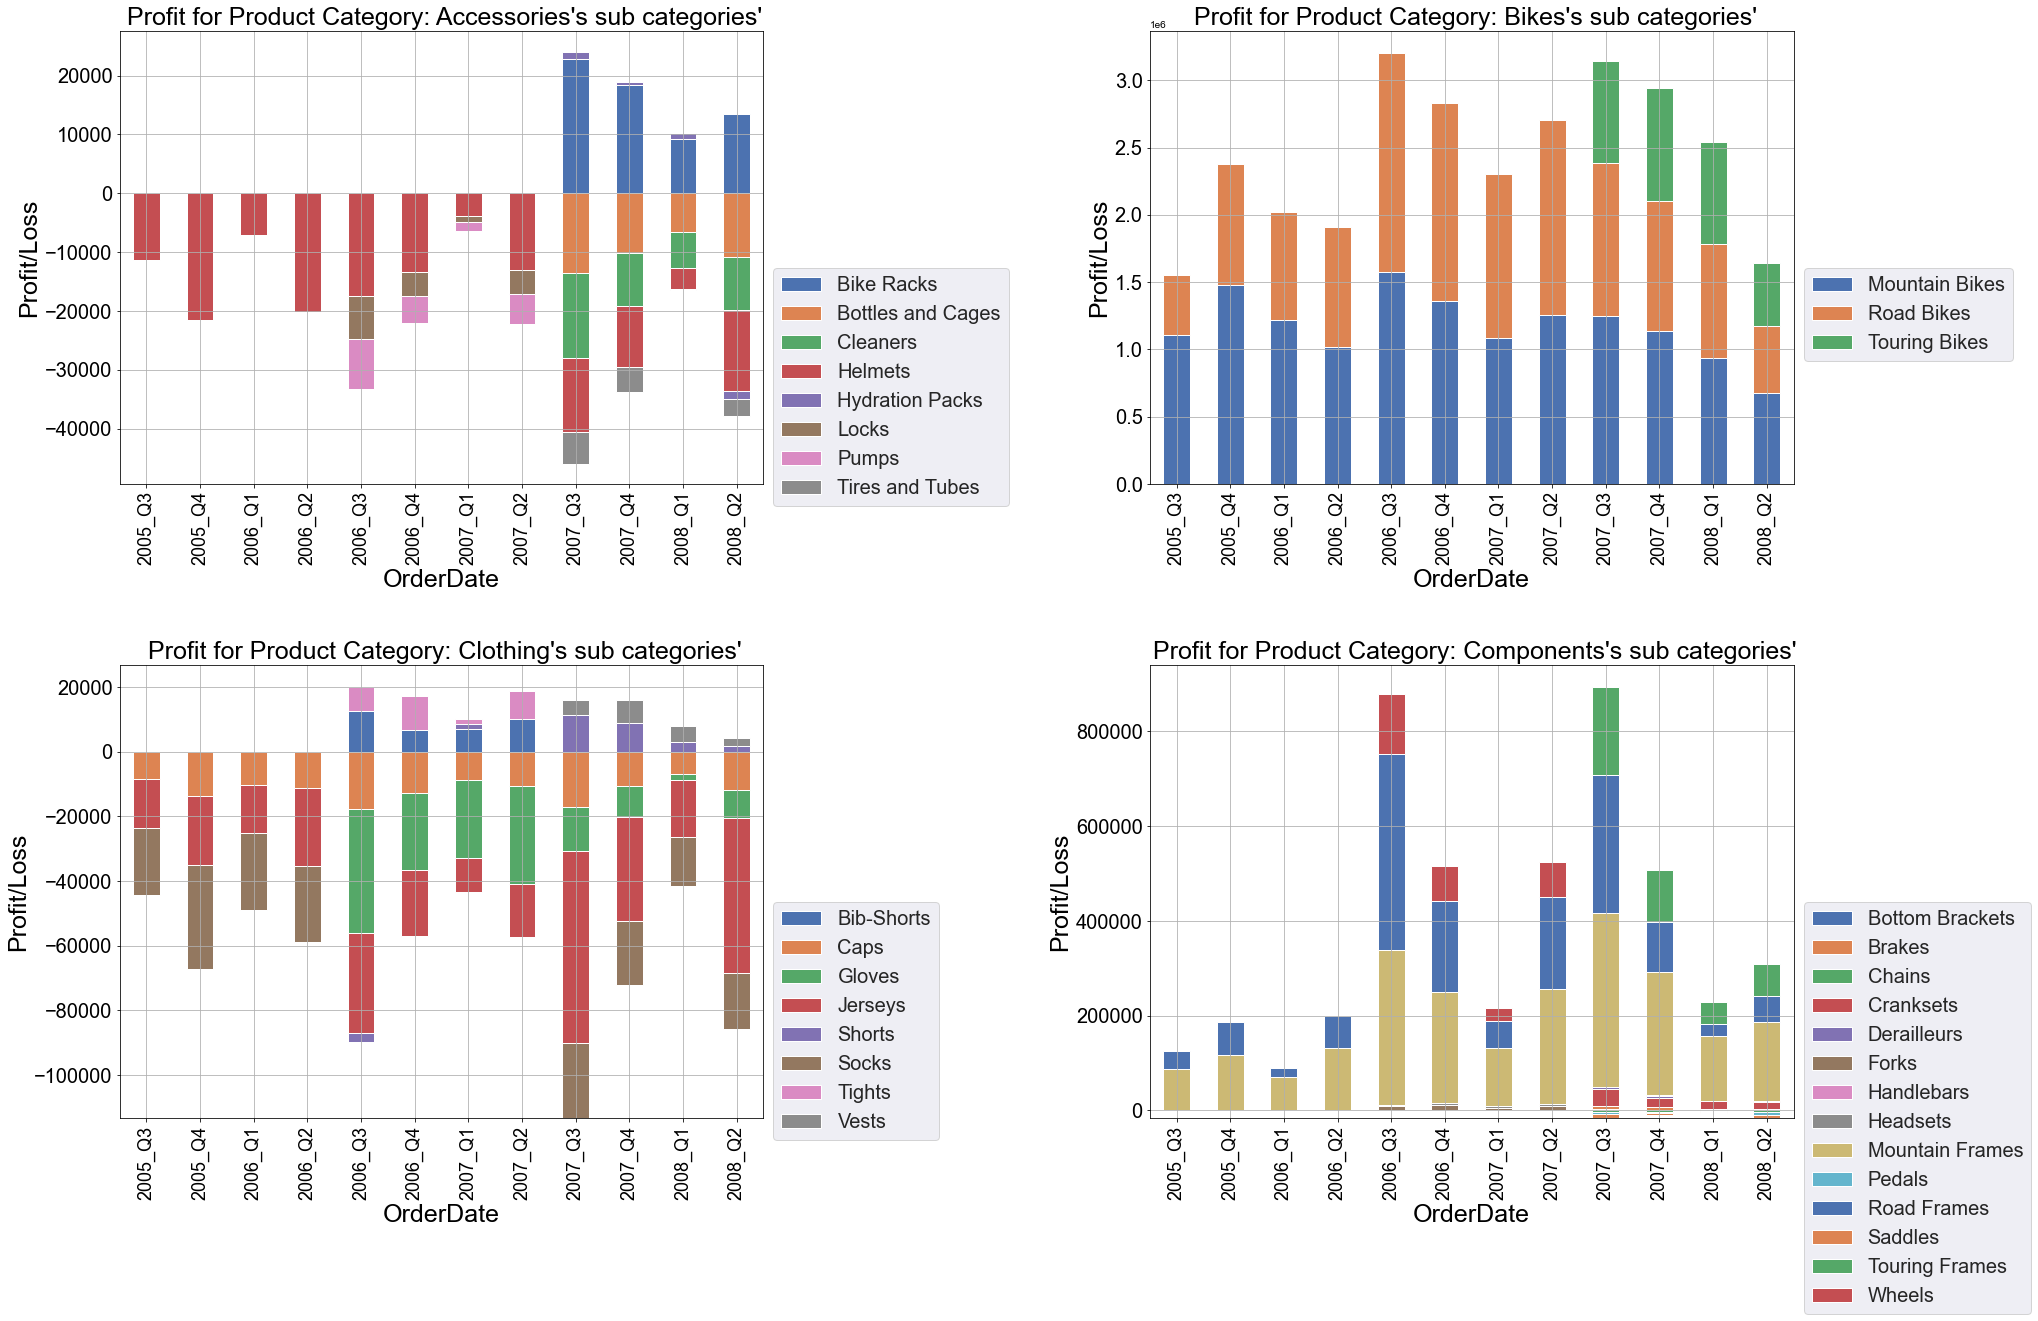

In [22]:
"""
- Calculate Profit for each product's sub categories
- pivot the table (to plot stacket bar chart)
- Plot depicting profit for each quarter for different product's sub categories
"""

product_sub_category = df.groupby([df['OrderDate'].apply(get_quarter),'Product_Category','Product_Sub_Category']).agg({'profit':'sum'}).reset_index()

fig, ax = plt.subplots(2,2, figsize = (30,20))
sns.set()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.6, hspace=0.4)

x_val,y_val = ['OrderDate', 'Product_Category','Product_Sub_Category'], 'profit'

product_category = ["Accessories","Bikes","Clothing","Components"]

for m, a in (zip(product_category, ax.flatten())):
    df_sub_Category = product_sub_category[(product_sub_category["Product_Category"] == m)]
    
    df_pivot = pd.pivot_table(df_sub_Category, index=x_val[0], columns=df_sub_Category["Product_Sub_Category"], 
                          values=y_val, aggfunc='sum')
    df_pivot.plot.bar(stacked=True, ax = a)
    a.set_title(" Profit for Product Category: " + m + "'s sub categories'", fontsize = 25)
    a.set_xlabel("OrderDate", fontsize = 25)
    a.set_ylabel("Profit/Loss", fontsize = 25)
    a.set_xticklabels(a.get_xticklabels(), rotation = 90, fontsize = 18)
    a.tick_params(axis="y", labelsize=20)
    a.legend(loc='upper left', bbox_to_anchor=(1, 0.5), fontsize = 20)

    
plt.show()    
fig.tight_layout()
fig.savefig('profit_product_sub_category.png')

## Number of customers over time

In [23]:
No_Of_Customers = df.groupby(df['OrderDate'].apply(get_quarter)).agg({'Customer_Name':"nunique"}).reset_index()

Text(0.5, 0, 'Order Date')

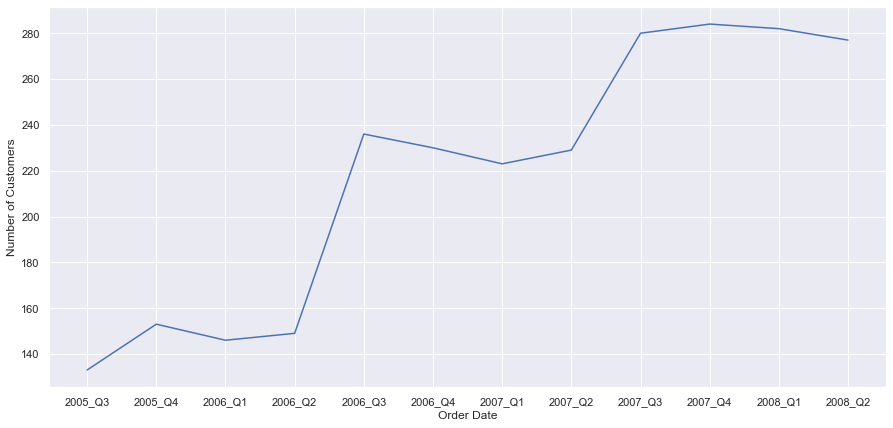

In [24]:
"""
Total customers over time
"""

plt.figure(figsize = (15,7))
plt.plot(No_Of_Customers['OrderDate'],No_Of_Customers['Customer_Name'])
plt.ylabel("Number of Customers")
plt.xlabel("Order Date")